In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import json

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Lectura de datos

In [3]:
# path a los archivos de datos
path_pozos = "datos/capitulo-iv-pozos.csv"
path_produccion_2024 = "datos/produccin-de-pozos-de-gas-y-petrleo-2024.csv"
path_no_convencionales = "datos/produccin-de-pozos-de-gas-y-petrleo-no-convencional.csv"

In [4]:
# lectura de datos
pozos = pd.read_csv(path_pozos)
produccion_2024 = pd.read_csv(path_produccion_2024)
no_convencionales = pd.read_csv(path_no_convencionales)

/tmp/ipykernel_26063/442322738.py:3: DtypeWarning: Columns (16,36) have mixed types. Specify dtype option on import or set low_memory=False.
  produccion_2024 = pd.read_csv(path_produccion_2024)


# Análisis exploratorio

## Pozos

In [5]:
pozos.head()

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom
0,CH.CH.EaLE.x-1,212,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,255.00,1702.0,EXPLORACION,EXPLORACION,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1996-10-30,1996-11-13,1996-11-17,1996-12-07,"{""type"":""Point"",""coordinates"":[-68.28785299999...",0101000020E61000008D43FD2E6C1251C00E4B033FAACB...
1,CH.CH.EaLE.x-2,213,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,251.00,1350.0,EXPLORACION,EXPLORACION,CONVENCIONAL,No informado,no,Inyección de Agua,Sin Sistema de Extracción,En Inyección Efectiva,1996-10-14,1996-11-13,1996-12-09,1996-12-17,"{""type"":""Point"",""coordinates"":[-68.29201899999...",0101000020E6100000E1B37570B01251C00BB5A679C7CB...
2,CH.CH.EaLE-3,214,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,256.15,1350.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-01-30,1997-02-07,1997-03-02,1997-03-10,"{""type"":""Point"",""coordinates"":[-68.28387800000...",0101000020E61000007383A10E2B1251C082548A1D8DCB...
3,CH.CH.EaLE-4,215,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,256.70,1351.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-01-13,1997-01-20,1997-01-23,1997-02-07,"{""type"":""Point"",""coordinates"":[-68.28948300000...",0101000020E6100000DF6FB4E3861251C0A148F7730ACC...
4,CH.CH.EaLE-5,216,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,256.00,1350.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-02-16,1997-02-24,1997-03-10,1997-03-18,"{""type"":""Point"",""coordinates"":[-68.29447500000...",0101000020E6100000569FABADD81251C0B98D06F016CC...


In [6]:
# transformacion de tipo fechas
col_fechas = ["adjiv_fecha_inicio_perf", "adjiv_fecha_fin_perf", "adjiv_fecha_inicio_term", "adjiv_fecha_fin_term"]
for col in col_fechas:
    pozos[col] = pd.to_datetime(pozos[col], format="%Y-%m-%d")

In [7]:
pozos.shape

(84332, 26)

In [8]:
area_to_cod_area = pozos.groupby('area')['cod_area'].nunique()
area_one_to_one = (area_to_cod_area <= 1).all()
area_one_to_one

np.False_

In [9]:
area_cod_mayor_uno = set(area_to_cod_area[area_to_cod_area > 1].index)

In [10]:
heatmap_areas_codigos = pozos[pozos['area'].isin(area_cod_mayor_uno)][["area", "cod_area"]].pivot_table(index="area", columns="cod_area", aggfunc="size", fill_value=0)

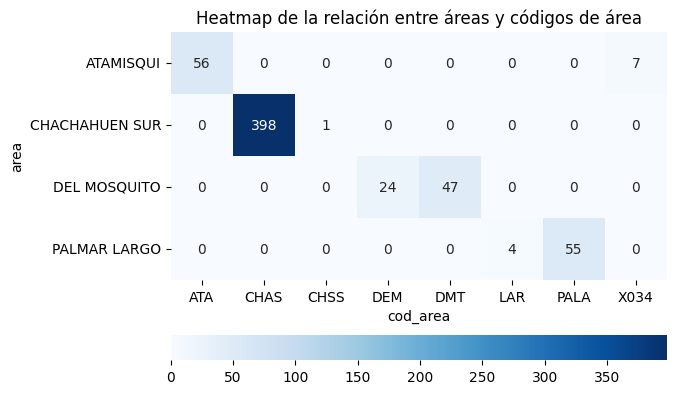

In [11]:
# plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_areas_codigos, cmap="Blues", annot=True, fmt="d", cbar=True, cbar_kws={'orientation': 'horizontal'})
plt.title("Heatmap de la relación entre áreas y códigos de área")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [12]:
pozos[(pozos["area"] == "ATAMISQUI") & (pozos["cod_area"] == "X034")]

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom
7950,EQ-1,39234,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1067.28,1897.0,No informado,No informado,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.55920000000...",0101000020E610000016FBCBEEC92351C008AC1C5A64CF...
7951,EQ-2,39235,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1072.60,1538.0,No informado,No informado,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.53522999999...",0101000020E6100000A3755435412251C0CCD1E3F736D9...
7952,M.EQ.x-4,39236,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1181.40,2104.0,No informado,No informado,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.61368000000...",0101000020E6100000658D7A88462751C01D7233DC80CF...
7954,M.EQ.a-6,39238,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1150.93,2125.0,No informado,No informado,No informado,No informado,no,Otro tipo,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.63120999999...",0101000020E61000001FBAA0BE652851C005FA449E24CD...
7956,YPF.Md.EQ.x-8,39240,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1144.64,2244.0,EXPLORACION,EXPLORACION,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.58921999999...",0101000020E61000008B89CDC7B52551C04D672783A3D4...
7957,YPF.Md.EQ.x-10,39241,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1107.00,2191.0,EXPLORACION,EXPLORACION,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.56901000000...",0101000020E61000003546EBA86A2451C0CEC29E76F8CB...
25482,YPF.Md.LNG.x-1,77771,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1080.43,1814.0,EXPLORACION,EXPLORACION,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.53776999999...",0101000020E610000046B1DCD26A2251C0A6ED5F5969D2...


In [13]:
def plot_mapa_pozos(pozos_df):
    geometry = [Point(xy) for xy in zip(pozos_df['longitude'], pozos_df['latitude'])]
    pozos_gdf = gpd.GeoDataFrame(pozos_df, geometry=geometry, crs="EPSG:4326")

    argentina = gpd.read_file("datos/argentina.geojson")
    argentina.plot(ax=plt.gca(), color='lightblue', edgecolor='black')

    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot the argentina GeoDataFrame
    argentina.plot(ax=ax, color='lightblue', edgecolor='black', label="Argentina")

    # Plot the pozos GeoDataFrame
    pozos_gdf.plot(ax=ax, color='blue', marker='o', markersize=20, label="Pozos", alpha=0.7)

    # Customize the plot
    plt.title("Geospatial Data: Pozos and Argentina")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()

    # Show the plot
    plt.show()

In [14]:
# Extract coordinates from the geojson column
def extract_coordinates(geojson_str):
    geojson = json.loads(geojson_str)
    return geojson['coordinates']

pozos['coordinates'] = pozos['geojson'].apply(extract_coordinates)
pozos['longitude'] = pozos['coordinates'].apply(lambda x: x[0])
pozos['latitude'] = pozos['coordinates'].apply(lambda x: x[1])

/tmp/ipykernel_26063/397628586.py:20: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


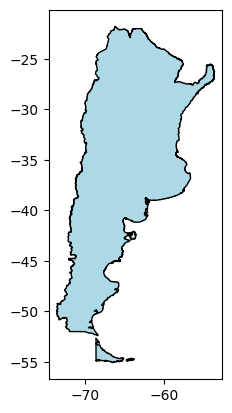

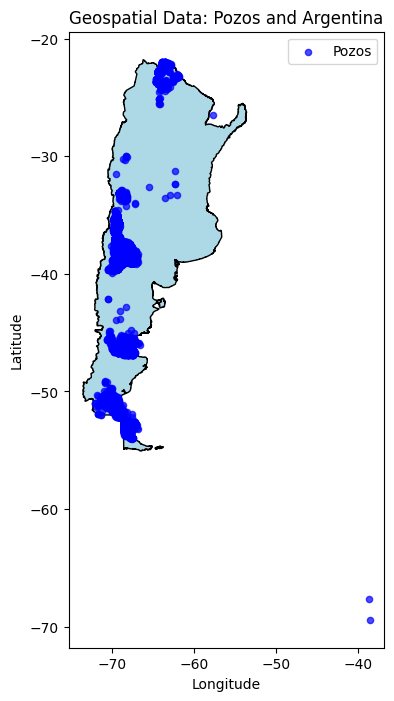

In [15]:
plot_mapa_pozos(pozos)

Hay dos pozos en el medio de la nada

In [16]:
pozos[pozos["longitude"] > -40]

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom,coordinates,longitude,latitude
4613,SJ.RN.LN-7,10143,LOMA NEGRA,LNE,CAPEX S.A.,LOMA NEGRA,LNE,lajas,NEUQUINA,Rio Negro,396.31,3329.0,EXPLOTACION,DESARROLLO,No informado,No informado,no,Petrolífero,Electrosumergible,Extracción Efectiva,1998-10-19,1998-11-09,1999-02-09,1999-02-20,"{""type"":""Point"",""coordinates"":[-38.756338,-67....",0101000020E61000006C5CFFAECF6043C0682096CD1CE9...,"[-38.756338, -67.642383]",-38.756338,-67.642383
80786,PBE.Nq.M-1063(d),162058,EL MANGRULLO,GRU,PAMPA ENERGIA S.A.,EL MANGRULLO,MGR,agrio,NEUQUINA,Neuquén,649.10,1525.0,EXPLOTACION,DESARROLLO,NO CONVENCIONAL,TIGHT,no,Gasífero,Surgencia Natural,Extracción Efectiva,2019-06-22,2019-07-03,2020-12-17,2021-01-06,"{""type"":""Point"",""coordinates"":[-38.59006999999...",0101000020E6100000E42CEC69874B43C01B2AC6F99B5A...,"[-38.59007, -69.41577]",-38.590070,-69.415770


Parece que latitud y longitud están intercambiados

In [17]:
# swap long and lat of idpozo 10143 and 162058
pozos.loc[pozos["idpozo"] == 10143, ["latitude", "longitude"]] = pozos.loc[pozos["idpozo"] == 10143, ["longitude", "latitude"]].values
pozos.loc[pozos["idpozo"] == 162058, ["latitude", "longitude"]] = pozos.loc[pozos["idpozo"] == 162058, ["longitude", "latitude"]].values

In [18]:
pozos.head()

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom,coordinates,longitude,latitude
0,CH.CH.EaLE.x-1,212,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,255.00,1702.0,EXPLORACION,EXPLORACION,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1996-10-30,1996-11-13,1996-11-17,1996-12-07,"{""type"":""Point"",""coordinates"":[-68.28785299999...",0101000020E61000008D43FD2E6C1251C00E4B033FAACB...,"[-68.287853, -45.591133]",-68.287853,-45.591133
1,CH.CH.EaLE.x-2,213,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,251.00,1350.0,EXPLORACION,EXPLORACION,CONVENCIONAL,No informado,no,Inyección de Agua,Sin Sistema de Extracción,En Inyección Efectiva,1996-10-14,1996-11-13,1996-12-09,1996-12-17,"{""type"":""Point"",""coordinates"":[-68.29201899999...",0101000020E6100000E1B37570B01251C00BB5A679C7CB...,"[-68.292019, -45.592025]",-68.292019,-45.592025
2,CH.CH.EaLE-3,214,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,256.15,1350.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-01-30,1997-02-07,1997-03-02,1997-03-10,"{""type"":""Point"",""coordinates"":[-68.28387800000...",0101000020E61000007383A10E2B1251C082548A1D8DCB...,"[-68.283878, -45.590244]",-68.283878,-45.590244
3,CH.CH.EaLE-4,215,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,256.70,1351.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-01-13,1997-01-20,1997-01-23,1997-02-07,"{""type"":""Point"",""coordinates"":[-68.28948300000...",0101000020E6100000DF6FB4E3861251C0A148F7730ACC...,"[-68.289483, -45.594069]",-68.289483,-45.594069
4,CH.CH.EaLE-5,216,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,256.00,1350.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-02-16,1997-02-24,1997-03-10,1997-03-18,"{""type"":""Point"",""coordinates"":[-68.29447500000...",0101000020E6100000569FABADD81251C0B98D06F016CC...,"[-68.294475, -45.59445]",-68.294475,-45.594450


/tmp/ipykernel_26063/397628586.py:20: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


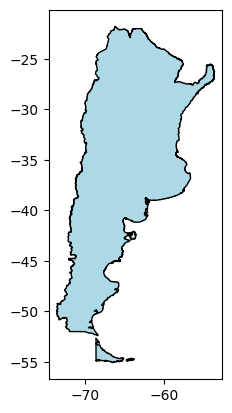

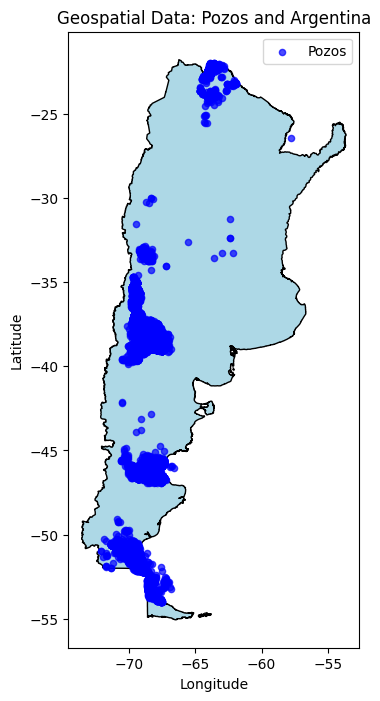

In [19]:
plot_mapa_pozos(pozos)

In [20]:
pozos["provincia"].value_counts()

provincia
Santa Cruz          23615
Chubut              22306
Neuquén             18682
Mendoza              8853
Rio Negro            5749
La Pampa             2724
Tierra del Fuego     1242
Salta                 965
Estado Nacional        73
Formosa                65
Jujuy                  46
San Juan                6
Córdoba                 6
Name: count, dtype: int64

In [21]:
def to_gdf(pozos_df, nombre_longitud = 'longitude', nombre_latitud = 'latitude'):
    geometry = [Point(xy) for xy in zip(pozos_df['longitude'], pozos_df['latitude'])]
    return gpd.GeoDataFrame(pozos_df, geometry=geometry, crs="EPSG:4326")

def plot_mapa_clipped(pozos_df, bounding_box):
    # Convert to GeoDataFrame
    pozos_gdf = to_gdf(pozos_df)

    argentina = geojson_data = gpd.read_file("datos/argentina.geojson")
    argentina.plot(ax=plt.gca(), color='lightblue', edgecolor='black')

    fig, ax = plt.subplots(figsize=(10, 8))
    bounding_box_gdf = gpd.GeoDataFrame({'geometry': [bounding_box]}, crs="EPSG:4326")

    # Clip Argentina GeoDataFrame to the bounding box
    argentina_clipped = gpd.clip(argentina, bounding_box_gdf)

    # Set up the plot
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot clipped Argentina GeoDataFrame
    argentina_clipped.plot(ax=ax, color='lightblue', edgecolor='black', label="Argentina")

    # Plot filtered pozos GeoDataFrame
    pozos_gdf.plot(ax=ax, color='blue', marker='o', markersize=10, label="Pozos", alpha=0.7)

    # Customize the plot
    plt.title("Geospatial Data: Pozos and Argentina (Clipped)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()

    # Show the plot
    plt.show()

/tmp/ipykernel_26063/2678751319.py:31: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


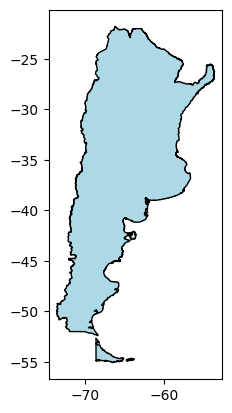

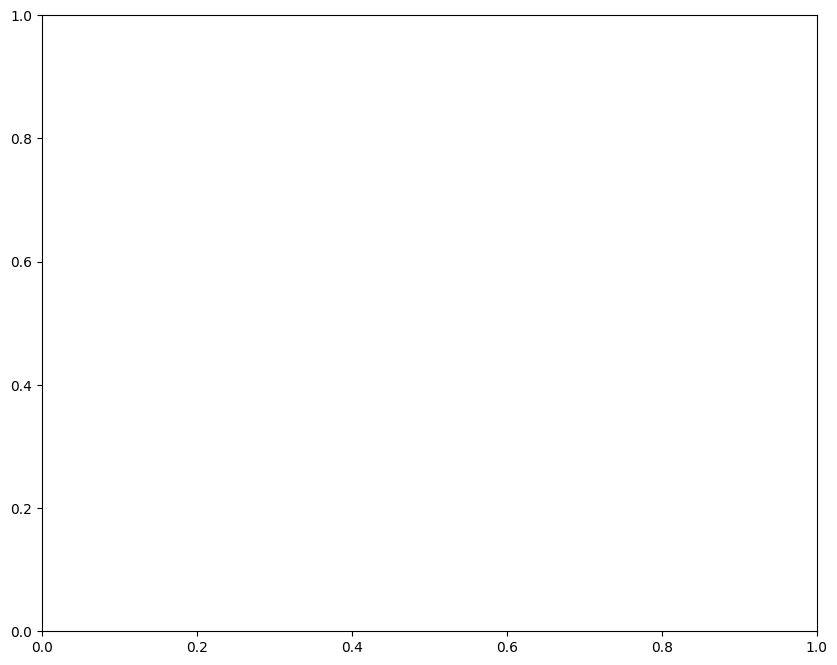

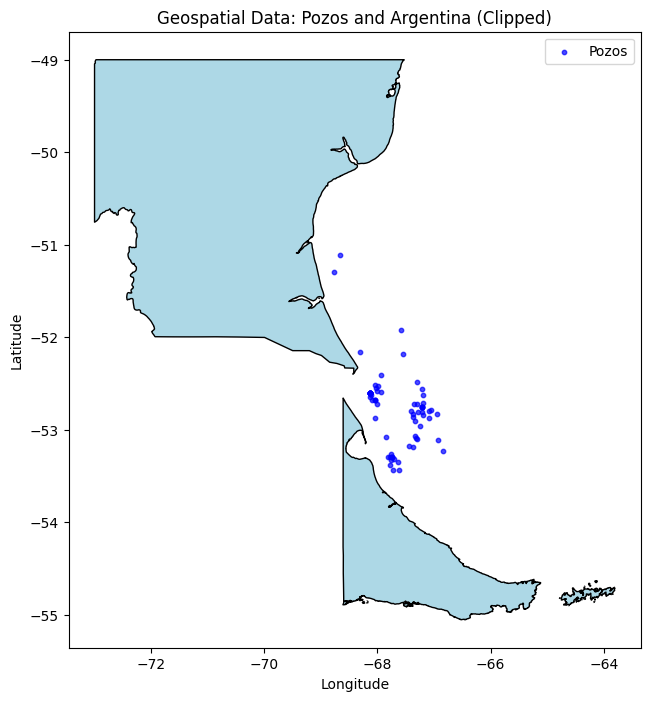

In [22]:
from shapely.geometry import box

# plot los pozos con provincia igual a "Estado Nacional"
pozos_estado_naciona = pozos[pozos["provincia"] == "Estado Nacional"]
box_to_clip = box(-73, -60, -60, -49)
plot_mapa_clipped(pozos_estado_naciona, box_to_clip)

## Produccion no convencional

In [23]:
no_convencionales.head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
0,YSUR,2018,1,132738,0.000,32.777,1.47,0.0,0.0,0.0,0.0,30.92,NaN,Plunger Lift,Extracción Efectiva,Gasífero,NaN,2018-02-10 08:37:14.717426,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,AEA.NQ.RCo-1036,PREC,2750.0,precuyo,SDD,AL SUR DE LA DORSAL,RQC,RANQUIL CO,NEUQUINA,Neuquén,-69.193743,-39.078336,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31
1,YSUR,2015,1,136137,2.590,494.570,11.50,0.0,0.0,0.0,0.0,31.00,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2015-02-26 13:35:35.533458,f,t,5,YSUR ENERGÍA ARGENTINA S.R.L.,APA.Nq.Gu-1199(d),PREC,3375.0,precuyo,NDD,AL NORTE DE LA DORSAL,GUA,GUANACO,NEUQUINA,Neuquén,-69.224930,-38.867937,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2015-01-31
2,YSUR,2018,1,132604,0.000,43.771,0.00,0.0,0.0,0.0,0.0,31.00,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2018-02-10 08:37:14.717426,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,AEA.NQ.Gu-1189d,PREC,2647.0,precuyo,NDD,AL NORTE DE LA DORSAL,GUA,GUANACO,NEUQUINA,Neuquén,-69.241585,-38.871419,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31
3,YSUR,2017,1,137602,0.000,444.020,51.01,0.0,0.0,0.0,0.0,31.00,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2017-02-16 13:45:37.233373,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,APA.Nq.Gu-1186(h)(I),BASA,3524.0,basamento,NDD,AL NORTE DE LA DORSAL,GUA,GUANACO,NEUQUINA,Neuquén,-69.245305,-38.853815,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2017-01-31
4,YSUR,2018,1,132492,14.353,430.948,25.89,0.0,0.0,0.0,0.0,31.00,NaN,Plunger Lift,Extracción Efectiva,Gasífero,NaN,2018-02-10 08:37:14.717426,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,AEA.NQ.RCo-1030,PREC,2752.0,precuyo,SDD,AL SUR DE LA DORSAL,RQC,RANQUIL CO,NEUQUINA,Neuquén,-69.185218,-39.078200,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31


## Produccion 2024

In [24]:
diff_cols_2024 = set(produccion_2024.columns) - set(no_convencionales.columns)
diff_cols_no_conv = set(no_convencionales.columns) - set(produccion_2024.columns)
diff_cols_2024, diff_cols_no_conv

(set(), {'coordenadax', 'coordenaday'})

In [25]:
produccion_2024.head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
0,Z001,2024,1,32186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otros Tipos de Extracción,En Reserva de Gas,Gasífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.BLO.es-1,FIMP,1963.0,formación improductiva,BLLO,PUESTO SURVELIN,PUSU,PUESTO SURVELIN,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
1,Z001,2024,1,144117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otros Tipos de Extracción,En Estudio,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.PS.x-1,FIMP,1600.0,formación improductiva,BLLO,PUESTO SURVELIN,PUSU,PUESTO SURVELIN,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
2,Z001,2024,1,145614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,En Estudio,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.FDR.x-1,PROS,2058.0,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
3,Z001,2024,1,145615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,En Reserva para Recup. Sec./Asist.,Inyección de Agua,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.FDRW.x-1,PROS,2034.0,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,SERVICIO,SUMIDERO,NaN,2024-01-31
4,Z001,2024,1,145626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.RN.-2,FIMP,1903.0,formación improductiva,AGR,GENERAL ROCA,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31


# Unicidad de datos
Nos gustaria verificar que: 
- Todos los pozos que estan en el dataset principal, tambien esten en alguno de los otros dos.
- Los pozos que estan en el dataset de pozos convencionales esten en el principal.
- Los pozos que estan el el dataset de pozos no convencionales esten en el principal.
- No este el mismo pozo en el dataset convencional y no convencional a la vez.
- Las ids de cada dataset sean unicas.

In [26]:
ids_pozos = set(pozos['idpozo'])
ids_produccion_2024 = set(produccion_2024['idpozo'])
ids_no_convencionales = set(no_convencionales['idpozo'])

In [27]:
cnt = pozos['idpozo'].value_counts()
len(cnt[cnt > 1])

0

La tabla principal no tiene duplicados.

In [28]:
produccion_2024['idpozo'].value_counts()

idpozo
154225    10
153840    10
137570    10
137420    10
145324    10
154224    10
145323    10
157031    10
136935    10
135641    10
135921    10
135880    10
136934    10
136274    10
136275    10
160563    10
137307    10
136118    10
134830    10
133561    10
134158    10
134449    10
134600    10
134274    10
130306    10
132692    10
131061    10
130308    10
130510    10
132336    10
131426    10
131964    10
161966    10
161965    10
161964    10
161963    10
161962    10
161961    10
161960    10
161959    10
162017    10
162016    10
162015    10
161971    10
161970    10
161969    10
161968    10
161967    10
162038    10
162037    10
162036    10
162035    10
162034    10
162033    10
162032    10
162018    10
162139    10
162138    10
162137    10
162135    10
162134    10
162087    10
162086    10
162076    10
161726    10
161725    10
161716    10
164266    10
164265    10
164264    10
164263    10
164262    10
161878    10
161851    10
161850    10
161843    10
16184

Se puede observar que en la tabla de pozos convencionales la mayoria de las ids se encuentran repetidas.

In [29]:
no_convencionales['idpozo'].value_counts()

idpozo
96629     226
96641     226
96687     226
96665     226
96664     226
96635     226
96643     226
96630     226
96639     226
96662     226
114867    226
114889    226
130482    226
130329    226
116076    226
115728    226
115725    226
42933     226
75605     226
115734    226
124664    226
130465    226
11191     226
96650     226
96633     226
129763    226
116022    226
115733    226
96642     226
73804     226
72016     226
72232     226
72233     226
96632     226
72206     226
42905     226
42900     226
75604     226
96644     226
96688     226
96689     226
42927     226
42936     226
42963     226
72228     226
96663     226
114888    226
115744    226
115664    226
73672     226
114880    226
42957     226
42966     226
42961     226
96659     226
96656     226
126736    226
96651     226
96634     226
96653     226
96657     226
10073     226
96636     226
11641     225
8043      225
11643     225
3640      225
34833     225
78337     225
11642     225
118332    224

Lo mismo ocurre en la de pozos no convencionales.

In [30]:
ids_en_ninguno_de_los_dos = ids_pozos - ids_produccion_2024 - ids_no_convencionales

len(ids_en_ninguno_de_los_dos)

2126

Hay cerca de 2000 que no son ni nconvencionales ni no convencionales.

In [31]:
ids_en_ambos_df = ids_produccion_2024 & ids_no_convencionales

len(ids_en_ambos_df)

4189

Vemos que hay pozos que son a la vez convencionales y no convencionales.

In [32]:
ids_prod_24_no_en_pozos = ids_produccion_2024 - ids_pozos

len(ids_prod_24_no_en_pozos)

55

Tambien hay pozos que estan en la lista de convencionales pero no en la general.

In [33]:
ids_no_conv_no_en_pozos = ids_no_convencionales - ids_pozos

len(ids_no_conv_no_en_pozos)

3

Lo mismo para los no convencionales, exploremos mas en detalle este caso que son pocos.

In [34]:
no_conv_no_en_pozos = no_convencionales[no_convencionales['idpozo'].isin(ids_no_conv_no_en_pozos)]
no_conv_no_en_pozos

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
271009,PAL,2024,10,165768,284.1272,23.44430,4332.90200,0.0,0.0,0.0,0.0,30.279860,NaN,Surgencia Natural,Extracción Efectiva,Petrolífero,NaN,2024-11-20 11:31:29.263597,f,t,462,PAN AMERICAN ENERGY SL,PAE.Nq.ECh-145(h),VMUT,6475.0,vaca muerta,LAT,LINDERO ATRAVESADO,LAOC,LINDERO ATRAVESADO OCCIDENTAL,NEUQUINA,Neuquén,-68.465997,-38.590230,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2024-10-31
271369,PAL,2024,10,165767,547.7212,47.53449,3960.73900,0.0,0.0,0.0,0.0,30.263890,NaN,Surgencia Natural,Extracción Efectiva,Petrolífero,NaN,2024-11-20 11:31:29.263597,f,t,462,PAN AMERICAN ENERGY SL,PAE.Nq.ECh-141(h),VMUT,6423.0,vaca muerta,LAT,LINDERO ATRAVESADO,LAOC,LINDERO ATRAVESADO OCCIDENTAL,NEUQUINA,Neuquén,-68.465883,-38.590171,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2024-10-31
271523,PAL,2024,10,165757,0.0000,17.71623,31.91664,0.0,0.0,0.0,0.0,0.552083,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2024-11-20 11:31:29.263597,f,t,462,PAN AMERICAN ENERGY SL,PAE.Nq.APO-243(h),VMUT,6043.0,vaca muerta,APO,AGUADA PICHANA OESTE,APO,AGUADA PICHANA OESTE,NEUQUINA,Neuquén,-69.408358,-38.454249,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2024-10-31


Veamos los pozos mas cercanos de la lista principal a los 3 que no aparecen de no convencionales

In [35]:
import math

def mas_cercano(pozo, pozos_df):
    min_dist = float('inf')
    id_mas_cerc = None
    for row in pozos_df.itertuples():
        dist = math.sqrt(((pozo['coordenadax'] - row.longitude) ** 2) + ((pozo['coordenaday'] - row.latitude) ** 2))
        if dist < min_dist:
            min_dist = dist
            id_mas_cerc = row.idpozo
    return id_mas_cerc

no_conv_no_en_pozos['idpozo_mas_cerc'] = no_conv_no_en_pozos.apply(lambda row: mas_cercano(row, pozos), axis=1)

no_conv_no_en_pozos

/tmp/ipykernel_26063/2712397496.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_conv_no_en_pozos['idpozo_mas_cerc'] = no_conv_no_en_pozos.apply(lambda row: mas_cercano(row, pozos), axis=1)


,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data,idpozo_mas_cerc
271009,PAL,2024,10,165768,284.1272,23.44430,4332.90200,0.0,0.0,0.0,0.0,30.279860,NaN,Surgencia Natural,Extracción Efectiva,Petrolífero,NaN,2024-11-20 11:31:29.263597,f,t,462,PAN AMERICAN ENERGY SL,PAE.Nq.ECh-145(h),VMUT,6475.0,vaca muerta,LAT,LINDERO ATRAVESADO,LAOC,LINDERO ATRAVESADO OCCIDENTAL,NEUQUINA,Neuquén,-68.465997,-38.590230,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2024-10-31,165653
271369,PAL,2024,10,165767,547.7212,47.53449,3960.73900,0.0,0.0,0.0,0.0,30.263890,NaN,Surgencia Natural,Extracción Efectiva,Petrolífero,NaN,2024-11-20 11:31:29.263597,f,t,462,PAN AMERICAN ENERGY SL,PAE.Nq.ECh-141(h),VMUT,6423.0,vaca muerta,LAT,LINDERO ATRAVESADO,LAOC,LINDERO ATRAVESADO OCCIDENTAL,NEUQUINA,Neuquén,-68.465883,-38.590171,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2024-10-31,165653
271523,PAL,2024,10,165757,0.0000,17.71623,31.91664,0.0,0.0,0.0,0.0,0.552083,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2024-11-20 11:31:29.263597,f,t,462,PAN AMERICAN ENERGY SL,PAE.Nq.APO-243(h),VMUT,6043.0,vaca muerta,APO,AGUADA PICHANA OESTE,APO,AGUADA PICHANA OESTE,NEUQUINA,Neuquén,-69.408358,-38.454249,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2024-10-31,165535


In [36]:
pozos[pozos['idpozo'].isin(no_conv_no_en_pozos['idpozo_mas_cerc'])]

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom,coordinates,longitude,latitude
84123,PAE.Nq.APO-245(h),165535,AGUADA PICHANA OESTE,APO,PAN AMERICAN ENERGY SL,AGUADA PICHANA OESTE,APO,vaca muerta,NEUQUINA,Neuquén,856.56,6124.0,EXPLOTACION,DESARROLLO,NO CONVENCIONAL,SHALE,no,Gasífero,Surgencia Natural,Extracción Efectiva,2024-01-27,2024-05-16,2024-05-20,2024-06-29,"{""type"":""Point"",""coordinates"":[-69.40849500000...",0101000020E6100000176536C8245A51C0CF9ECBD4243A...,"[-69.408495, -38.454249]",-69.408495,-38.454249
84241,PAE.Nq.ECh-143(h),165653,LINDERO ATRAVESADO,LAT,PAN AMERICAN ENERGY SL,LINDERO ATRAVESADO OCCIDENTAL,LAOC,vaca muerta,NEUQUINA,Neuquén,421.13,6481.0,EXPLOTACION,DESARROLLO,NO CONVENCIONAL,SHALE,no,Petrolífero,Surgencia Natural,Extracción Efectiva,2024-02-05,2024-05-27,2024-08-04,2024-08-27,"{""type"":""Point"",""coordinates"":[-68.46611699999...",0101000020E610000004C765DCD41D51C0221807978E4B...,"[-68.466117, -38.590289]",-68.466117,-38.590289


Se puede ver que estos pozos tienen 2 muy cercanos en la lista principal, pero ni la ID ni la sigla coinciden, aunque pareceria que la sigla tiene algun significado. Con mas informacion sobre como funcionan las siglas quizas se podria desambiguar esta falta de unicidad.

De los documentos provistos por https://www.ign.gob.ar/NuestrasActividades/InformacionGeoespacial/CapasSIG, los mas interesantes para enriquecer este trabajo podrian ser la capa "Yacimiento de hidrocarburo" en la categoria "industria y servicios", a partir de la cual podriamos definir una distancia maxima aceptable de nuestros pozos a cada uno de esos yacimientos, y considerar como outliers a los que esten mas lejos que eso. Tambien de la capa "Provincia" en la categoria "Geodesia y demarcacion" podriamos utilizar los poligonos para validar que los posos se encuentren en la provincia que dicen estar.